In [4]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import seaborn as sns
import string
import spacy
nlp = spacy.load("en_core_web_sm")

In [6]:
airbnb = pd.read_csv("C:/Users/nigel/Documents/MSDS/Data Visualization/Final Project/AB_NYC_2019.csv")

In [8]:
airbnb.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [10]:
# Let's start with an easy one: a wordcloud.
# OK well it's theoretically easy but in practice I HATE TEXT IN PYTHON I HATE TEXT IN PYTHON
# it's actually not bad here though because the worst part is always uploading text but here it's already done alongside the rest of the df

In [12]:
names = ""
for desc in airbnb["name"]:
    names = names + str(desc) + " " #add spaces between each entry so they don't make weird conglomerate words (this isn't German!)
stopwords = ["a", "an", "of", "and", "NY", "NYC", "ny", "nyc",
             "the", "in", "by", "with", "to", "New York", "city",
             "for", "s", "very"] #establish words to remove from analysis
names_split = names.split()
names = ' '.join([word for word in names_split if word.lower() not in stopwords])

In [15]:
names

'Clean & quiet apt home park Skylit Midtown Castle VILLAGE HARLEM....NEW YORK ! Cozy Entire Floor Brownstone Entire Apt: Spacious Studio/Loft central park Large Cozy 1 BR Apartment Midtown East BlissArtsSpace! Large Furnished Room Near B\'way Cozy Clean Guest Room - Family Apt Cute & Cozy Lower East Side 1 bdrm Beautiful 1br on Upper West Side Central Manhattan/near Broadway Lovely Room 1, Garden, Best Area, Legal rental Wonderful Guest Bedroom Manhattan SINGLES West Village Nest - Superhost Only 2 stops Manhattan studio Perfect Your Parents + Garden Chelsea Perfect Hip Historic Brownstone Apartment Backyard Huge 2 BR Upper East Cental Park Sweet Spacious Brooklyn Loft CBG CtyBGd HelpsHaiti rm#1:1-4 CBG Helps Haiti Room#2.5 CBG Helps Haiti Rm #2 MAISON DES SIRENES1,bohemian apartment Sunny Bedroom Across Prospect Park Magnifique Suite au N de Manhattan - vue Cloitres Midtown Pied-a-terre SPACIOUS, LOVELY FURNISHED MANHATTAN BEDROOM Modern 1 BR / / EAST VILLAGE front room/double bed Spa

In [22]:
# Quick and dirty way to remove punctuation by replacing with spaces:
translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
names = names.translate(translator)

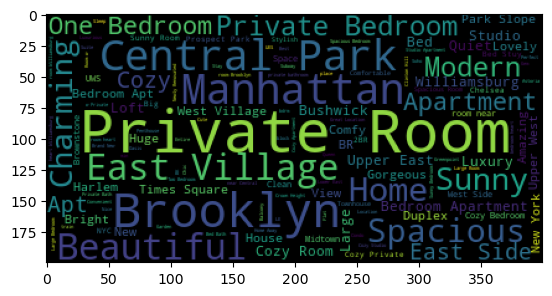

In [19]:
wc = WordCloud().generate(names)
plt.imshow(wc)

In [14]:
# Create masks based on logos for NYC/Airbnb and Statue of Liberty outline:
nyc_mask = np.array(Image.open('NYC Logo.png'))
# airbnb_mask = np.array(Image.open("Airbnb Logo Border.png"))
# airbnb_mask_inv = np.array(Image.open("Airbnb Logo Inverted.png"))
# statue_mask = np.array(Image.open("Statue of Liberty Outline.png"))

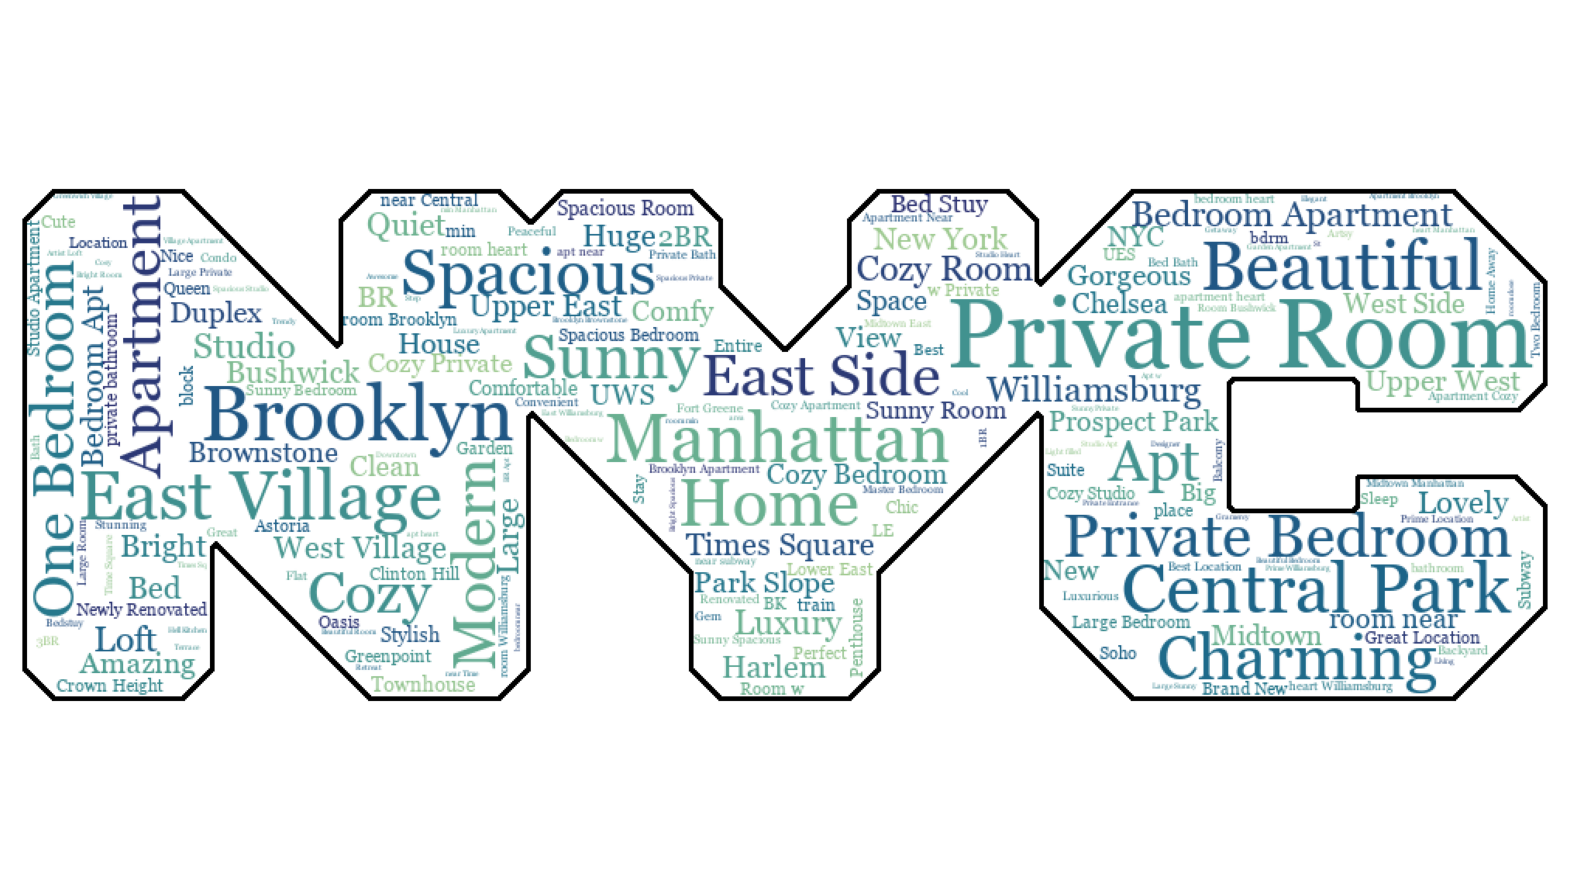

In [16]:
wc = WordCloud(background_color = "white", mask = nyc_mask, contour_width = 2, contour_color = "black",
               colormap = sns.color_palette("crest", as_cmap = True), font_path = "georgia", width = 2000, height = 1250).generate(names)
plt.figure(figsize = (20, 20))
plt.axis("off")
plt.imshow(wc)
plt.savefig("NYC Word Cloud.png")

In [18]:
# What if we separated these by borough?
# (There is probably a more efficient way to do all of these at once but I don't know what it is)

airbnb_bronx = airbnb[airbnb["neighbourhood_group"] == "Bronx"]
airbnb_brooklyn = airbnb[airbnb["neighbourhood_group"] == "Brooklyn"]
airbnb_manhattan = airbnb[airbnb["neighbourhood_group"] == "Manhattan"]
airbnb_queens = airbnb[airbnb["neighbourhood_group"] == "Queens"]
airbnb_staten = airbnb[airbnb["neighbourhood_group"] == "Staten Island"]

bronx_names = ""
brooklyn_names = ""
manhattan_names = ""
queens_names = ""
staten_names = ""

for desc in airbnb_bronx["name"]:
    bronx_names = bronx_names + str(desc) + " "
for desc in airbnb_brooklyn["name"]:
    brooklyn_names = brooklyn_names + str(desc) + " "
for desc in airbnb_manhattan["name"]:
    manhattan_names = manhattan_names + str(desc) + " "
for desc in airbnb_queens["name"]:
    queens_names = queens_names + str(desc) + " "
for desc in airbnb_staten["name"]:
    staten_names = staten_names + str(desc) + " "

bronx_names_split = bronx_names.split()
brooklyn_names_split = brooklyn_names.split()
manhattan_names_split = manhattan_names.split()
queens_names_split = queens_names.split()
staten_names_split = staten_names.split()

bronx_names = ' '.join([word for word in bronx_names_split if word.lower() not in stopwords])
brooklyn_names = ' '.join([word for word in brooklyn_names_split if word.lower() not in stopwords])
manhattan_names = ' '.join([word for word in manhattan_names_split if word.lower() not in stopwords])
queens_names = ' '.join([word for word in queens_names_split if word.lower() not in stopwords])
staten_names = ' '.join([word for word in staten_names_split if word.lower() not in stopwords])

In [24]:
bronx_names = bronx_names.translate(translator)
brooklyn_names = brooklyn_names.translate(translator)
manhattan_names = manhattan_names.translate(translator)
queens_names = queens_names.translate(translator)
staten_names = staten_names.translate(translator)

In [26]:
# Create some masks for each of these
bronx_mask = np.array(Image.open('Bronx Yankee Stadium.png'))
brooklyn_mask = np.array(Image.open('Brooklyn Bridge.png'))
manhattan_mask = np.array(Image.open('Statue of Liberty Outline.png'))
queens_mask = np.array(Image.open('Queens Unisphere.png'))
staten_mask = np.array(Image.open('Staten Island Ferry.png'))

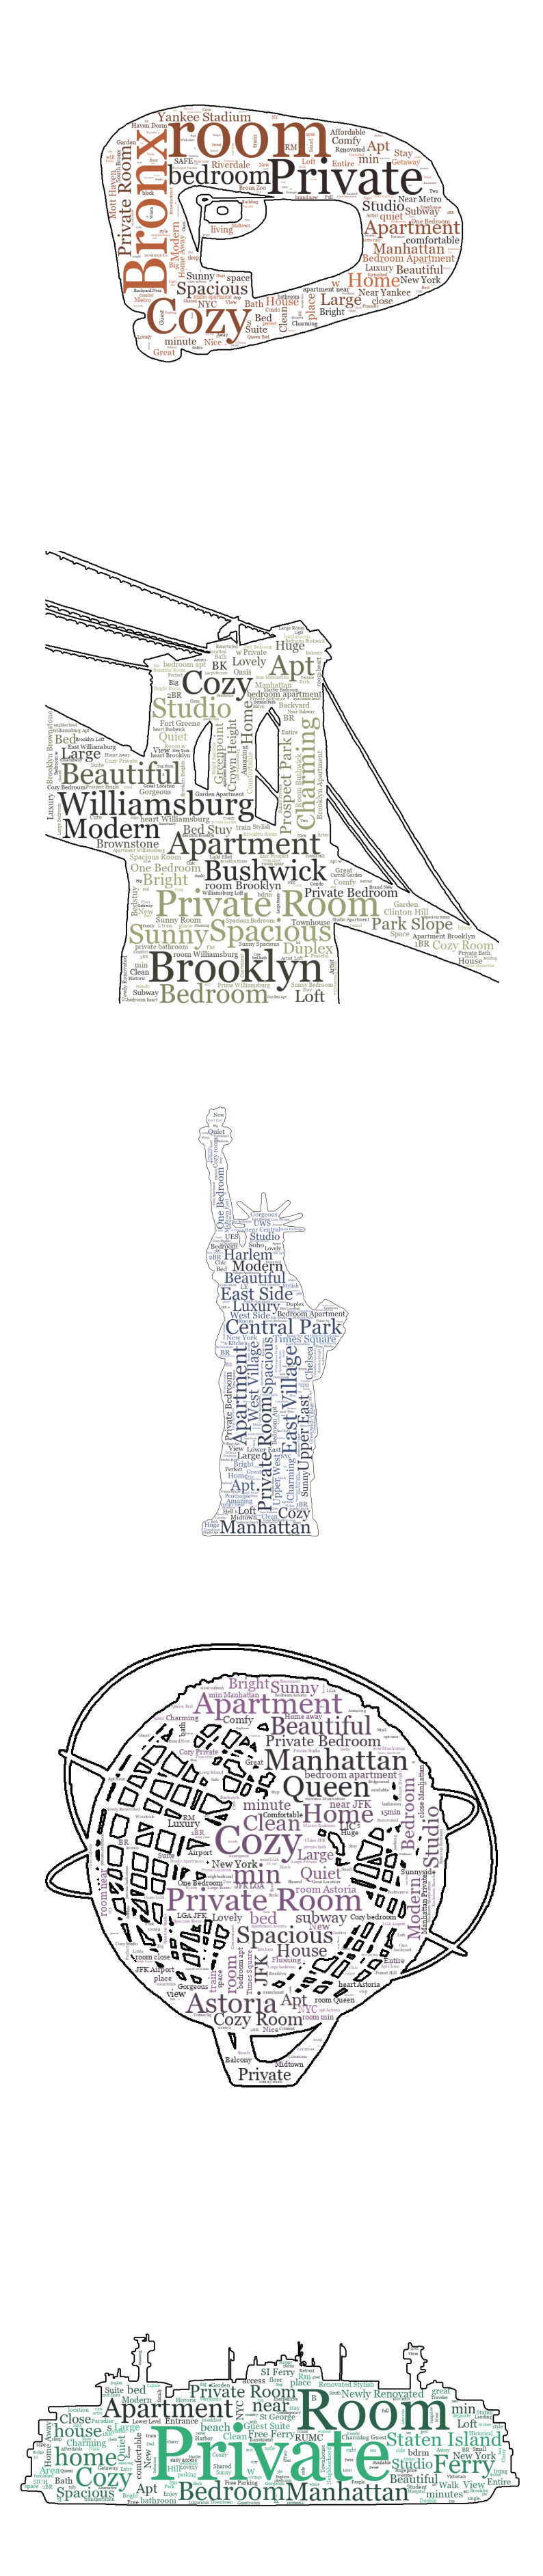

In [28]:
# Let's make some subplots!
masks = [bronx_mask, brooklyn_mask, manhattan_mask, queens_mask, staten_mask]
borough_colors = ["#d1693d", "#b8ba86", "#5773b5", "#9a689c", "#36b57e"]
borough_names = [bronx_names, brooklyn_names, manhattan_names, queens_names, staten_names]
plt.figure(figsize = (10, 50))
for i, N in enumerate(masks):
    plt.subplot(5, 1, i+1)
    wc = WordCloud(background_color = "white", mask = N, contour_width = 2, contour_color = "black", colormap = sns.dark_palette(borough_colors[i], as_cmap = True), font_path = "georgia", width = 2000, height = 1250).generate(borough_names[i])
    plt.axis("off")
    plt.imshow(wc)

In [30]:
# Can we tell more concretely which words show up disproportionately in certain boroughs' listing descriptions?

from collections import Counter

def construct_wordcount_df(text, min_count = 20):
    df = pd.DataFrame(Counter(text.lower().split()).most_common(), columns = ["Word", "Count"])
    wordcount = df["Count"].sum()
    df = df[df["Count"] >= min_count]
    df["Proportion"] = df["Count"] / wordcount
    return df

In [32]:
counter_nyc = construct_wordcount_df(names, min_count = 100)
counter_nyc = counter_nyc.rename(columns = {"Count": "Overall Count", "Proportion": "Overall Proportion"})
counter_nyc

Word  Overall Count  Overall Proportion
0         room          10279            0.039550
1      bedroom           8200            0.031551
2      private           7386            0.028419
3    apartment           6756            0.025995
4         cozy           5086            0.019569
..         ...            ...                 ...
315     simple            104            0.000400
316       wall            103            0.000396
317     circle            101            0.000389
318   hideaway            100            0.000385
319          j            100            0.000385

[320 rows x 3 columns]

In [34]:
bronx_counter = construct_wordcount_df(bronx_names)
brooklyn_counter = construct_wordcount_df(brooklyn_names)
manhattan_counter = construct_wordcount_df(manhattan_names)
queens_counter = construct_wordcount_df(queens_names)
staten_counter = construct_wordcount_df(staten_names, min_count = 10)

In [36]:
bronx_counter = bronx_counter.merge(counter_nyc, on = "Word")
brooklyn_counter = brooklyn_counter.merge(counter_nyc, on = "Word")
manhattan_counter = manhattan_counter.merge(counter_nyc, on = "Word")
queens_counter = queens_counter.merge(counter_nyc, on = "Word")
staten_counter = staten_counter.merge(counter_nyc, on = "Word")

In [38]:
queens_counter

Word  Count  Proportion  Overall Count  Overall Proportion
0         room   1517    0.049741          10279            0.039550
1      private    998    0.032723           7386            0.028419
2      bedroom    860    0.028199           8200            0.031551
3         cozy    774    0.025379           5086            0.019569
4    manhattan    713    0.023379           3579            0.013771
..         ...    ...         ...            ...                 ...
186      rooms     20    0.000656            135            0.000519
187          l     20    0.000656            333            0.001281
188        gem     20    0.000656            345            0.001327
189      share     20    0.000656            113            0.000435
190       cosy     20    0.000656            245            0.000943

[191 rows x 5 columns]

In [40]:
def ratio(df):
    df["Word Type"] = "a"
    df["Borough % Diff"] = df["Proportion"] / df["Overall Proportion"] * 100 - 100

    words = ""
    for j in range(len(df)):
        words = words + df.iloc[j, 0] + " "
    nlp_words = nlp(words)
    for j in range(len(df)):
        df.iloc[j, 5] = nlp_words[j].pos_.lower()

    return df.sort_values("Borough % Diff", ascending = False)

bronx_counter = ratio(bronx_counter)
brooklyn_counter = ratio(brooklyn_counter)
manhattan_counter = ratio(manhattan_counter)
queens_counter = ratio(queens_counter)
staten_counter = ratio(staten_counter)

In [42]:
brooklyn_counter.head(10)

Word  Count  Proportion  Overall Count  Overall Proportion  \
64        bedstuy    314    0.003052            314            0.001208   
33     greenpoint    559    0.005434            559            0.002151   
28          slope    606    0.005891            606            0.002332   
131       bedford    126    0.001225            126            0.000485   
141       carroll    119    0.001157            119            0.000458   
72         greene    281    0.002732            281            0.001081   
29       prospect    593    0.005764            594            0.002285   
5    williamsburg   2728    0.026518           2734            0.010519   
50           stuy    416    0.004044            417            0.001604   
58          crown    341    0.003315            342            0.001316   

    Word Type  Borough % Diff  
64      propn      152.641607  
33      propn      152.641607  
28      propn      152.641607  
131      noun      152.641607  
141      verb      152.641607  
72       noun      152.641607  
29       noun      152.216284  
5        noun      152.087163  
50        adj      152.035751  
58       verb      151.902888

In [44]:
brooklyn_counter[brooklyn_counter["Word Type"] == "adj"].head(10)

Word  Count  Proportion  Overall Count  Overall Proportion Word Type  \
50       stuy    416    0.004044            417            0.001604       adj   
120     artsy    145    0.001410            236            0.000908       adj   
115    trendy    149    0.001448            246            0.000947       adj   
93   friendly    182    0.001769            301            0.001158       adj   
9       sunny   1704    0.016564           2943            0.011324       adj   
83      light    231    0.002245            402            0.001547       adj   
128  peaceful    130    0.001264            237            0.000912       adj   
20     bright    936    0.009099           1720            0.006618       adj   
172      cool     88    0.000855            164            0.000631       adj   
85   historic    218    0.002119            413            0.001589       adj   

     Borough % Diff  
50       152.035751  
120       55.224716  
115       53.022762  
93        52.760041  
9         46.279748  
83        45.174655  
128       38.579784  
20        37.484037  
172       35.563789  
85        33.355618

In [46]:
# Fix a classification error that shows up on the Brooklyn visualizations
brooklyn_counter.iloc[8, 5] = "propn"

In [48]:
brooklyn_counter.head(10)

Word  Count  Proportion  Overall Count  Overall Proportion  \
64        bedstuy    314    0.003052            314            0.001208   
33     greenpoint    559    0.005434            559            0.002151   
28          slope    606    0.005891            606            0.002332   
131       bedford    126    0.001225            126            0.000485   
141       carroll    119    0.001157            119            0.000458   
72         greene    281    0.002732            281            0.001081   
29       prospect    593    0.005764            594            0.002285   
5    williamsburg   2728    0.026518           2734            0.010519   
50           stuy    416    0.004044            417            0.001604   
58          crown    341    0.003315            342            0.001316   

    Word Type  Borough % Diff  
64      propn      152.641607  
33      propn      152.641607  
28      propn      152.641607  
131      noun      152.641607  
141      verb      152.641607  
72       noun      152.641607  
29       noun      152.216284  
5        noun      152.087163  
50      propn      152.035751  
58       verb      151.902888

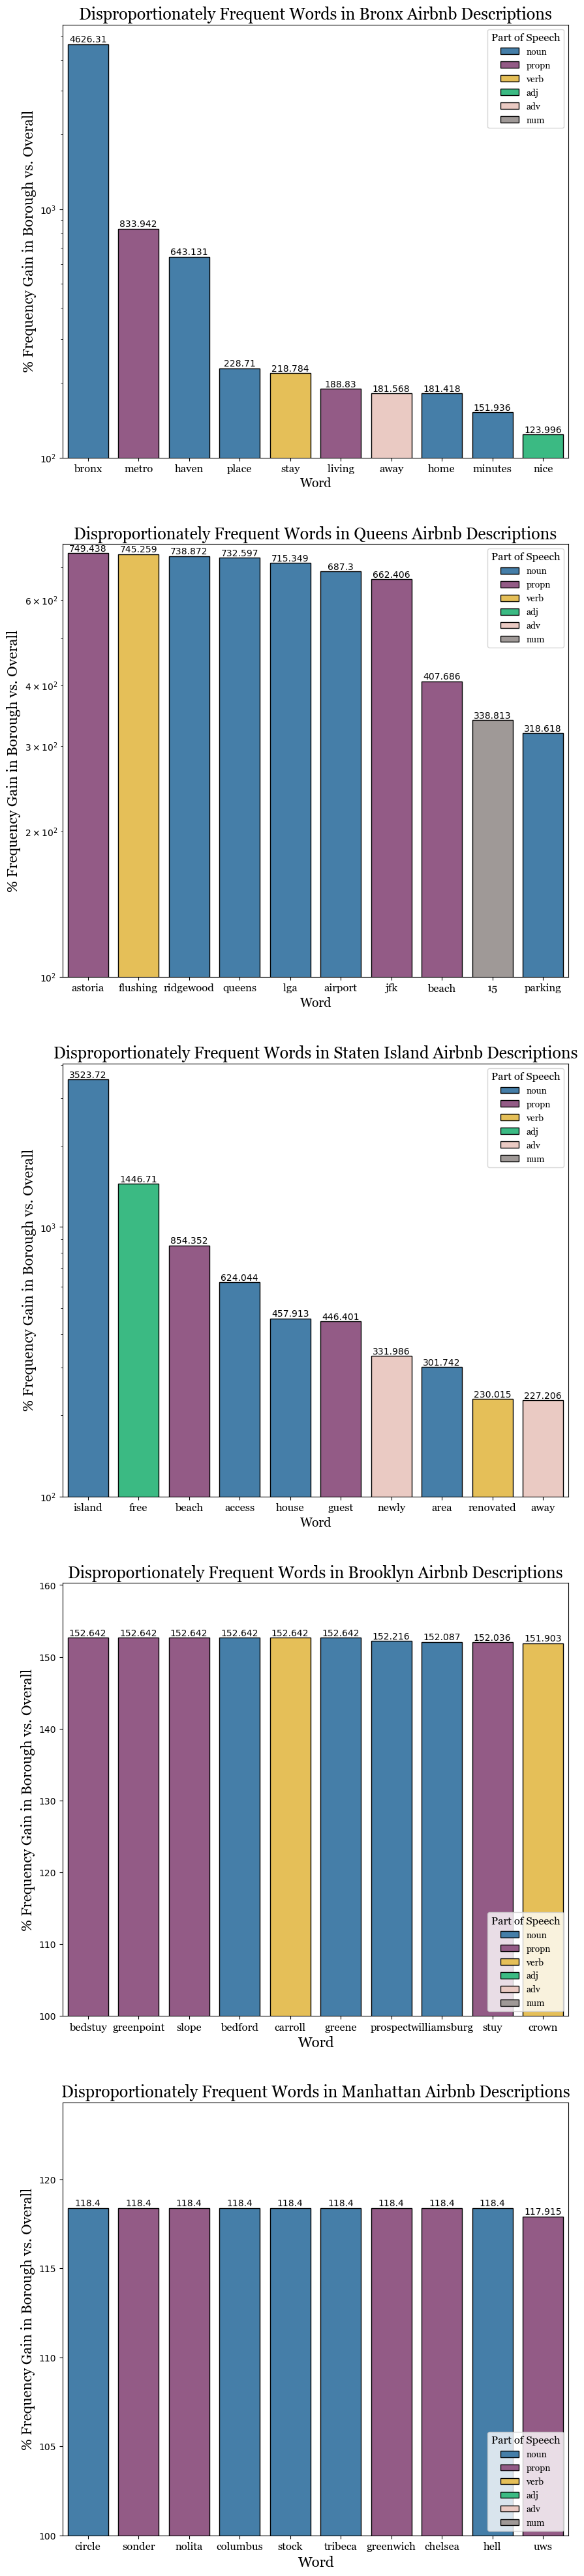

In [50]:
plt.figure(figsize = (10, 50))
borough_trending_words = [bronx_counter.head(10), queens_counter.head(10), staten_counter.head(10), brooklyn_counter.head(10), manhattan_counter.head(10)]
boroughs = ["Bronx", "Queens", "Staten Island", "Brooklyn", "Manhattan"]
colors = ["#3581B8", "#9C528B", "#FDCA40", "#26CF86", "#F0C6BC", "#A09896"]
order = ["noun", "propn", "verb", "adj", "adv", "num"]

# The Bronx, Queens, and Staten Island all have certain words that are thousands of percentage points more popular, leading to a wide array of values presented. Log scale better shows this.
for i in range(3):
    plt.subplot(5, 1, i+1)
    ax = sns.barplot(data = borough_trending_words[i], x = "Word", y = "Borough % Diff", hue = "Word Type", palette = colors, hue_order = order, edgecolor = "black")
    plt.yscale("log")
    plt.title("Disproportionately Frequent Words in " + boroughs[i] + " Airbnb Descriptions", font = "georgia", size = 18)
    plt.ylim(bottom = 100)
    plt.xticks(font = "Georgia", size = 12)
    plt.xlabel("Word", font = "georgia", size = 14)
    plt.ylabel("% Frequency Gain in Borough vs. Overall", font = "georgia", size = 16)
    plt.legend(title = "Part of Speech", loc = "upper right", prop={'family': 'georgia'}, title_fontproperties = {"family": "georgia", "size": 12})
    for j in range(6):
        plt.bar_label(ax.containers[j], fontsize = 10)

# Brooklyn and Manhattan shouldn't have log scales attached because of how their values are much more clustered together, close to a 100% increase.
for i in (3, 4):
    plt.subplot(5, 1, i+1)
    ax = sns.barplot(data = borough_trending_words[i], x = "Word", y = "Borough % Diff", hue = "Word Type", palette = colors, hue_order = order, edgecolor = "black")
    plt.title("Disproportionately Frequent Words in " + boroughs[i] + " Airbnb Descriptions", font = "georgia", size = 18)
    plt.ylim(bottom = 100)
#    plt.yscale("log")
    plt.xticks(font = "Georgia", size = 12)
    plt.xlabel("Word", font = "georgia", size = 16)
    plt.ylabel("% Frequency Gain in Borough vs. Overall", font = "georgia", size = 16)
    plt.legend(title = "Part of Speech", loc = "lower right", prop= {'family': 'georgia'}, title_fontproperties = {"family": "georgia", "size": 12})
    for j in range(6):
       plt.bar_label(ax.containers[j], fontsize = 10)

In [52]:
staten_counter[staten_counter["Word Type"] == "adj"].head(3)

Word  Count  Proportion  Overall Count  Overall Proportion Word Type  \
15     free     21    0.010355            174            0.000669       adj   
16      new     19    0.009369           1581            0.006083       adj   
0   private     84    0.041420           7386            0.028419       adj   

    Borough % Diff  
15     1446.708155  
16       54.013950  
0        45.749915

IndexError: list index out of range

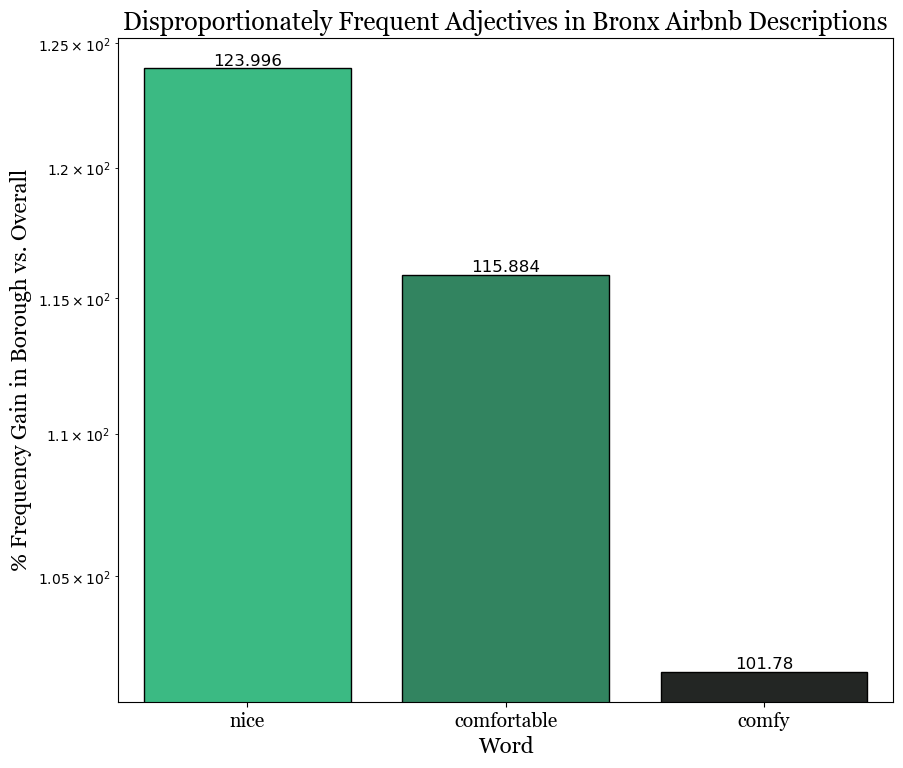

In [54]:
# What if we only looked at adjectives? Are certain boroughs' listings described as more lively, quiet, private, etc. than others'?
borough_trending_adjs = [bronx_counter[bronx_counter["Word Type"] == "adj"].head(3),
                         queens_counter[queens_counter["Word Type"] == "adj"].head(3),
                         staten_counter[staten_counter["Word Type"] == "adj"].head(3),
                         brooklyn_counter[brooklyn_counter["Word Type"] == "adj"].head(3),
                         manhattan_counter[manhattan_counter["Word Type"] == "adj"].head(3)]

plt.figure(figsize = (10, 50))
for i in range(5):
    plt.subplot(5, 1, i+1)
    ax = sns.barplot(data = borough_trending_adjs[i], x = "Word", y = "Borough % Diff", hue = "Borough % Diff", palette = sns.dark_palette("#26CF86", as_cmap = True), legend = False, edgecolor = "black")
    plt.yscale("log")
    plt.title("Disproportionately Frequent Adjectives in " + boroughs[i] + " Airbnb Descriptions", font = "georgia", size = 18)
    plt.xticks(font = "Georgia", size = 14)
    plt.xlabel("Word", font = "georgia", size = 16)
    plt.ylabel("% Frequency Gain in Borough vs. Overall", font = "georgia", size = 16)
    for j in range(5):
        plt.bar_label(ax.containers[j], fontsize = 12)

In [56]:
def add_borough(df, i):
    df["Borough"] = boroughs[i]
    return df

borough_trending_adjs = [bronx_counter[bronx_counter["Word Type"] == "adj"].head(3),
                         brooklyn_counter[brooklyn_counter["Word Type"] == "adj"].head(3),
                         manhattan_counter[manhattan_counter["Word Type"] == "adj"].head(3),
                         queens_counter[queens_counter["Word Type"] == "adj"].head(3),
                         staten_counter[staten_counter["Word Type"] == "adj"].head(3)]
boroughs = ["Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"]

bronx_adj = add_borough(borough_trending_adjs[0], 0)
queens_adj = add_borough(borough_trending_adjs[1], 1)
staten_adj = add_borough(borough_trending_adjs[2], 2)
brooklyn_adj = add_borough(borough_trending_adjs[3], 3)
manhattan_adj = add_borough(borough_trending_adjs[4], 4)

In [58]:
adj_full = pd.concat([bronx_adj, queens_adj, staten_adj, brooklyn_adj, manhattan_adj]).reset_index(drop = True)

In [60]:
adj_full

Word  Count  Proportion  Overall Count  Overall Proportion  \
0          nice     20    0.003637            422            0.001624   
1   comfortable     28    0.005092            613            0.002359   
2         comfy     26    0.004728            609            0.002343   
3         artsy    145    0.001410            236            0.000908   
4        trendy    149    0.001448            246            0.000947   
5      friendly    182    0.001769            301            0.001158   
6         upper   1347    0.011319           1357            0.005221   
7       central   1674    0.014067           1815            0.006983   
8        square    995    0.008361           1095            0.004213   
9          long     61    0.002000            129            0.000496   
10         free     51    0.001672            174            0.000669   
11         open     31    0.001016            121            0.000466   
12         free     21    0.010355            174            0.000669   
13          new     19    0.009369           1581            0.006083   
14      private     84    0.041420           7386            0.028419   

   Word Type  Borough % Diff        Borough  
0        adj      123.995918          Bronx  
1        adj      115.883831          Bronx  
2        adj      101.780231          Bronx  
3        adj       55.224716       Brooklyn  
4        adj       53.022762       Brooklyn  
5        adj       52.760041       Brooklyn  
6        adj      116.790260      Manhattan  
7        adj      101.433103      Manhattan  
8        adj       98.454514      Manhattan  
9        adj      302.972161         Queens  
10       adj      149.778957         Queens  
11       adj      118.328908         Queens  
12       adj     1446.708155  Staten Island  
13       adj       54.013950  Staten Island  
14       adj       45.749915  Staten Island

C:\Users\nigel\AppData\Local\Temp\ipykernel_37004\817171274.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(adj_full["Word"])


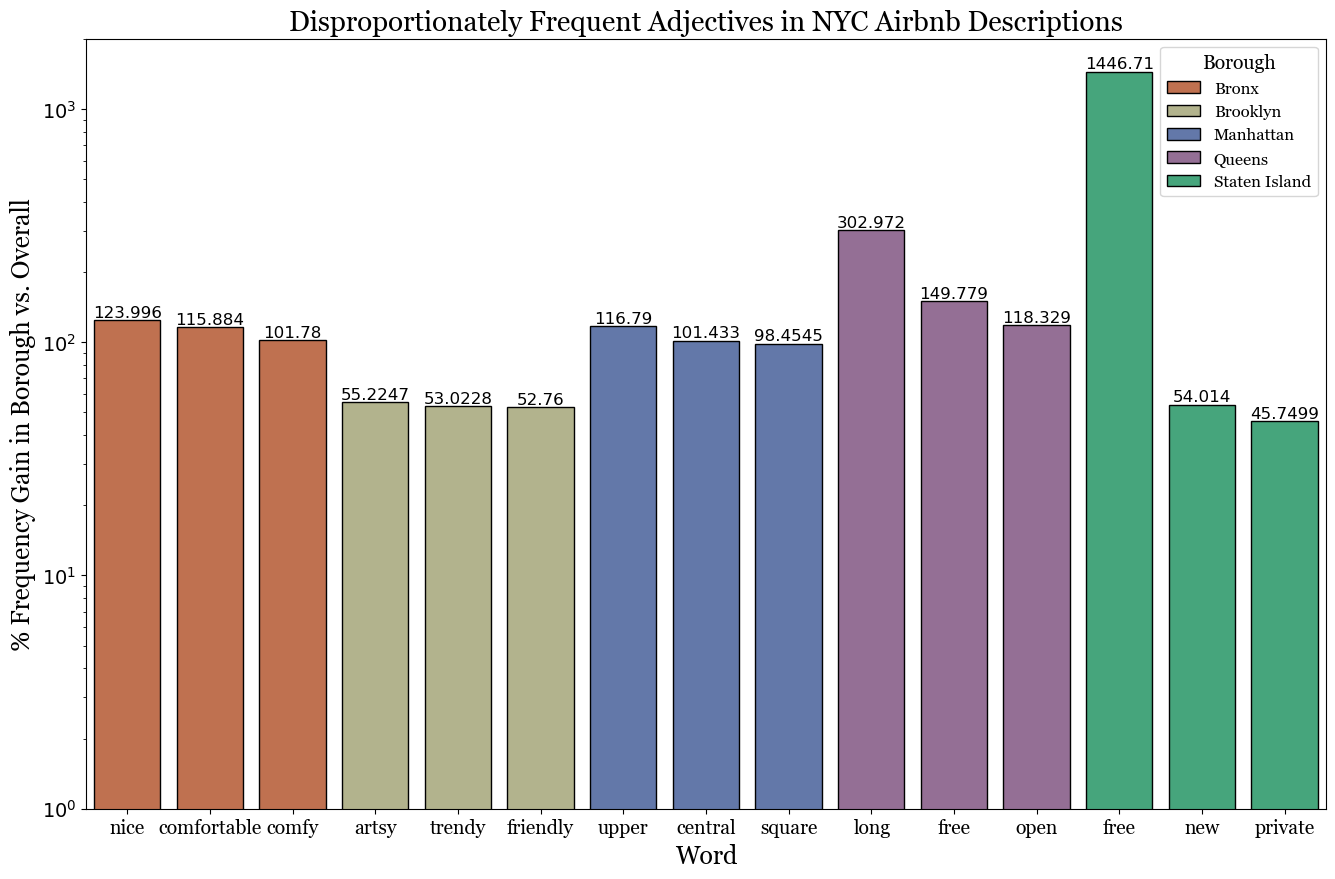

In [327]:
borough_colors = ["#d1693d", "#b8ba86", "#5773b5", "#9a689c", "#36b57e"]

plt.figure(figsize = (16, 10))
ax = sns.barplot(data = adj_full, x = adj_full.index, y = "Borough % Diff", hue = "Borough", palette = borough_colors, hue_order = boroughs, edgecolor = "black")
ax.set_xticklabels(adj_full["Word"])
plt.yscale("log")
plt.title("Disproportionately Frequent Adjectives in NYC Airbnb Descriptions", font = "georgia", size = 20)
plt.xticks(font = "Georgia", size = 14)
plt.yticks(size = 14)
plt.xlabel("Word", font = "georgia", size = 18)
plt.ylabel("% Frequency Gain in Borough vs. Overall", font = "georgia", size = 18)
plt.ylim(bottom = 1, top = 2000)
plt.legend(title = "Borough", loc = "upper right", prop={'family': 'georgia', "size": 12}, title_fontproperties = {"family": "georgia", "size": 14})
for j in range(5):
        plt.bar_label(ax.containers[j], fontsize = 12)